In [202]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [203]:
def generate_data(no_points):
    X = np.zeros(shape=(no_points, 2))
    Y = np.zeros(shape=no_points)
    for ii in range(no_points):
        X[ii, 0] = random.randint(0,20)
        X[ii, 1] = random.randint(0,20)
        if X[ii, 0]+X[ii, 1] > 20:
            Y[ii] = 1 
        else:
            Y[ii] = -1
    return X, Y

X, y = generate_data(100)
X = np.hstack((X, (np.ones((X.shape[0], 1)))))

In [204]:
def perceptron_learning_algorithm(X: np.ndarray, y: np.ndarray, max_iterations: int = 10000) -> np.ndarray:
    w = np.random.rand(X.shape[1])
    for iteration in range(max_iterations): 
        w_updated = False
        for i in range(X.shape[0]):
            x = X[i]    
            if y[i] * np.dot(w, x) <= 0:
                w = w + y[i]*x
                w_updated = True
        if w_updated == False:
            break
    return w
            
            

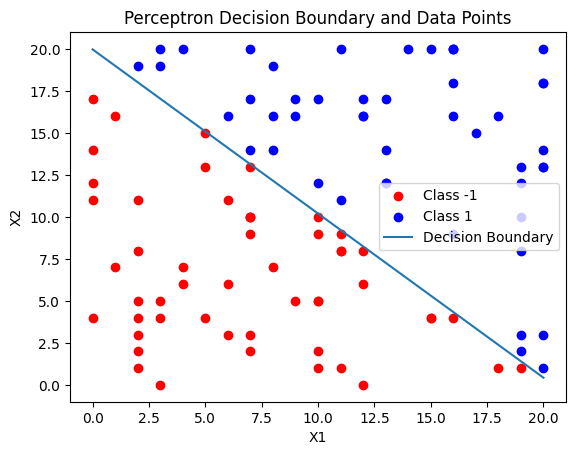

In [205]:
w_star = perceptron_learning_algorithm(X, y)
w1, w2, w0 = w_star[0:3]

import numpy as np
import matplotlib.pyplot as plt

# Assuming X, y, w1, w2, w0 are already defined

# Scatter plot of the data points, color-coded by y
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Class -1')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')

# Decision boundary calculation
x_values = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
y_values = -(w0 + w1 * x_values) / w2

# Plotting the decision boundary
plt.plot(x_values, y_values, label='Decision Boundary')

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.title('Perceptron Decision Boundary and Data Points')
plt.show()



In [208]:
def classify_element(w, x): 
    pred = np.dot(w, x) 
    if pred >= 0:
        return 1
    return -1

def classify(w, X):
    preds = np.dot(w, X)
    return np.where(preds >= 0, 1, -1)